Ridhwan Nashir - 1301184259 - IF42-01

IGD Raditya Wibhawa MN - 1301180508 - IF42-01
# **Tugas Besar Machine Learning 2 Classification**

Pada tugas klasifikasi ini akan dibandingkan akurasi dari 6 metode klasifikasi.

Pada notebook ini, akan dilakukan 6 percobaan yaitu :

1. Klasifikasi menggunakan NB
2. Klasifikasi menggunakan SVM
3. Klasifikasi menggunakan KNN
4. Klasifikasi menggunakan Logistic Regression
5. Klasifikasi menggunakan Decision Tree
6. Klasifikasi menggunakan Random Forest

Hasil dari keenam percobaan tersebut kemudian akan dibandingkan akurasinya.

# Eksplorasi Data

In [1]:
# library
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Test

In [2]:
# datatest
url = 'https://raw.githubusercontent.com/ridhwanashir/ML-Classification-NBSVM/main/salju_test.csv'
datatest = pd.read_csv(url) 
datatest.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


In [3]:
datatest.dtypes

Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

## Data Train

In [4]:
# datatrain
url = 'https://raw.githubusercontent.com/ridhwanashir/ML-Classification-NBSVM/main/salju_train.csv'
datatrain = pd.read_csv(url) 
datatrain.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [5]:
datatrain.dtypes

id                            int64
Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

# Preprocessing Data


## Pemilihan Fitur
melakukan drop terhadap fitur dengan tipe data object kecuali fitur ***BersajuHariIni*** dan ***BersaljuBesok***

In [6]:
datatrain.drop(['id','Tanggal','KodeLokasi','ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm'], axis='columns', inplace=True)
datatrain.dtypes


SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
KecepatanAnginTerkencang    float64
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

In [7]:
datatest.drop(['Tanggal','KodeLokasi','ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm'], axis='columns', inplace=True)
datatest.dtypes

SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
KecepatanAnginTerkencang    float64
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

## Duplikasi Datatrain

In [8]:
# Cek duplikat datatrain 
duplicate_check = datatrain.duplicated()
print("Sebelum")
print('Jumlah Data Duplikat = %d' % (duplicate_check.sum()))
print('Total Data = %d' % (datatrain.shape[0]))


Sebelum
Jumlah Data Duplikat = 177
Total Data = 109095


In [9]:
# Hapus data duplikat
datatrain = datatrain.drop_duplicates()
duplicate_check = datatrain.duplicated()
print("Sesudah")
print('Jumlah Data Duplikat = %d' % (duplicate_check.sum()))
print('Total Data = %d' % (datatrain.shape[0]))

Sesudah
Jumlah Data Duplikat = 0
Total Data = 108918


## Drop Missing Value
melakukan drop terhadap data yang mengandung nilai *null*

### Test

In [10]:
# Cek missing value
missingdata=datatest.isnull().sum().sort_values(ascending = False)
print(missingdata)

SinarMatahari               8718
Penguapan                   7856
Awan3pm                     7456
Awan9am                     7042
Tekanan9am                  1865
Tekanan3pm                  1853
KecepatanAnginTerkencang    1274
Kelembaban3pm                548
Suhu3pm                      442
BersaljuBesok                419
Hujan                        387
BersaljuHariIni              387
KecepatanAngin3pm            354
Kelembaban9am                330
Suhu9am                      219
KecepatanAngin9am            198
SuhuMax                      165
SuhuMin                      165
dtype: int64


In [11]:
datatest = datatest.dropna(how='any')
datatest.isnull().sum()

SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
KecepatanAnginTerkencang    0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

In [12]:
datatest.describe

<bound method NDFrame.describe of        SuhuMin  SuhuMax  Hujan  ...  Suhu3pm  BersaljuHariIni  BersaljuBesok
2          9.2     27.2    0.0  ...     26.3               No             No
3         17.7     27.0    0.0  ...     26.4               No             No
7         14.4     22.4    0.0  ...     20.9               No             No
8         20.3     33.7    0.0  ...     32.2               No             No
10         8.1     18.2    0.0  ...     17.7               No             No
...        ...      ...    ...  ...      ...              ...            ...
18170     13.4     24.9    0.0  ...     23.7               No             No
18174     14.6     27.8    0.0  ...     25.3               No             No
18177      7.8     25.8    0.0  ...     24.0               No             No
18178     12.4     26.6    0.0  ...     25.7               No             No
18180     12.5     26.7    0.0  ...     25.4               No             No

[7225 rows x 18 columns]>

### Train

In [13]:
# Cek missing value
missingdata=datatrain.isnull().sum().sort_values(ascending = False)
print(missingdata)

SinarMatahari               52203
Penguapan                   46848
Awan3pm                     44294
Awan9am                     41667
Tekanan9am                  11150
Tekanan3pm                  11131
KecepatanAnginTerkencang     7519
Kelembaban3pm                3197
Suhu3pm                      2521
BersaljuBesok                2289
Hujan                        2289
BersaljuHariIni              2289
KecepatanAngin3pm            2126
Kelembaban9am                1825
KecepatanAngin9am            1176
Suhu9am                      1163
SuhuMin                       945
SuhuMax                       757
dtype: int64


In [14]:
datatrain = datatrain.dropna(how='any')
datatrain.isnull().sum()

SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
KecepatanAnginTerkencang    0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

In [15]:
datatrain.describe

<bound method NDFrame.describe of         SuhuMin  SuhuMax  Hujan  ...  Suhu3pm  BersaljuHariIni  BersaljuBesok
3           7.3     24.5    0.0  ...     23.2            Tidak          Tidak
4           5.9     20.3    0.0  ...     18.1            Tidak          Tidak
5          14.4     21.8    0.0  ...     21.1            Tidak          Tidak
6           7.7     18.7    0.2  ...     18.3            Tidak          Tidak
8          18.4     35.3    0.0  ...     34.9            Tidak          Tidak
...         ...      ...    ...  ...      ...              ...            ...
109080     16.8     34.1    0.0  ...     33.0            Tidak          Tidak
109082      8.7     19.0    0.0  ...     16.5            Tidak          Tidak
109088     14.3     26.2    0.0  ...     25.5            Tidak          Tidak
109090     20.1     23.7    0.0  ...     22.1            Tidak             Ya
109093     10.8     29.8    0.0  ...     29.2            Tidak          Tidak

[43677 rows x 18 columns]>

## Scaling Fitur
menjadikan fitur ***BersajuHariIni*** dan ***BersaljuBesok*** menjadi nilai boolean (1 atau 0), dan melakukan normalisasi terhadap fitur yang lain ke dalam *range* 0-1

### Test

In [16]:
d = {'Yes': 1, 'No': 0}
datatest['BersaljuHariIni'] = datatest['BersaljuHariIni'].map(d)
datatest['BersaljuBesok'] = datatest['BersaljuBesok'].map(d)
datatest.head()


,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
2,9.2,27.2,0.0,5.2,10.4,33.0,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,0,0
3,17.7,27.0,0.0,4.6,6.7,35.0,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,0,0
7,14.4,22.4,0.0,4.4,3.9,28.0,9.0,11.0,57.0,51.0,1022.6,1020.7,7.0,7.0,18.3,20.9,0,0
8,20.3,33.7,0.0,11.8,11.1,52.0,20.0,24.0,54.0,33.0,1007.7,1005.6,5.0,5.0,24.6,32.2,0,0
10,8.1,18.2,0.0,1.6,5.1,31.0,11.0,15.0,94.0,48.0,1027.1,1024.5,7.0,7.0,10.3,17.7,0,0


In [17]:
# Split Data Test (label)
testtarget = datatest.iloc[:,[17]]
testtarget.head()

,BersaljuBesok
2,0
3,0
7,0
8,0
10,0


In [18]:
# Split Data Test (fitur)
testdata = datatest.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
testdata.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni
2,9.2,27.2,0.0,5.2,10.4,33.0,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,0
3,17.7,27.0,0.0,4.6,6.7,35.0,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,0
7,14.4,22.4,0.0,4.4,3.9,28.0,9.0,11.0,57.0,51.0,1022.6,1020.7,7.0,7.0,18.3,20.9,0
8,20.3,33.7,0.0,11.8,11.1,52.0,20.0,24.0,54.0,33.0,1007.7,1005.6,5.0,5.0,24.6,32.2,0
10,8.1,18.2,0.0,1.6,5.1,31.0,11.0,15.0,94.0,48.0,1027.1,1024.5,7.0,7.0,10.3,17.7,0


In [19]:
from sklearn.preprocessing import MinMaxScaler

nd_datatest = MinMaxScaler(feature_range=(0,1)).fit_transform(testdata)
nd_datatest

array([[0.40524781, 0.48267327, 0.        , ..., 0.35849057, 0.52058111,
        0.        ],
       [0.65306122, 0.47772277, 0.        , ..., 0.58490566, 0.52300242,
        0.        ],
       [0.55685131, 0.36386139, 0.        , ..., 0.47708895, 0.38983051,
        0.        ],
       ...,
       [0.36443149, 0.4480198 , 0.        , ..., 0.43665768, 0.46489104,
        0.        ],
       [0.49854227, 0.46782178, 0.        , ..., 0.44474394, 0.50605327,
        0.        ],
       [0.50145773, 0.47029703, 0.        , ..., 0.60107817, 0.49878935,
        0.        ]])

In [20]:
nd_datatest.shape

(7225, 17)

### Train

In [21]:
d = {'Ya': 1, 'Tidak': 0}
datatrain['BersaljuHariIni'] = datatrain['BersaljuHariIni'].map(d)
datatrain['BersaljuBesok'] = datatrain['BersaljuBesok'].map(d)
datatrain.head()


,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
3,7.3,24.5,0.0,8.4,10.4,54.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5.9,20.3,0.0,3.6,12.6,37.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0
5,14.4,21.8,0.0,3.2,4.4,39.0,19.0,20.0,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0,0
6,7.7,18.7,0.2,5.6,9.7,46.0,19.0,28.0,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0,0
8,18.4,35.3,0.0,10.0,12.5,33.0,11.0,13.0,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0,0


In [22]:
# Split Data Train (label)
traintarget = datatrain.iloc[:,[17]]
traintarget.head()

,BersaljuBesok
3,0
4,0
5,0
6,0
8,0


In [23]:
# Split Data Train (fitur)
traindata = datatrain.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
traindata.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni
3,7.3,24.5,0.0,8.4,10.4,54.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0
4,5.9,20.3,0.0,3.6,12.6,37.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0
5,14.4,21.8,0.0,3.2,4.4,39.0,19.0,20.0,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0
6,7.7,18.7,0.2,5.6,9.7,46.0,19.0,28.0,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0
8,18.4,35.3,0.0,10.0,12.5,33.0,11.0,13.0,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0


In [24]:
from sklearn.preprocessing import MinMaxScaler

nd_datatrain = MinMaxScaler(feature_range=(0,1)).fit_transform(traindata)
nd_datatrain

array([[0.37634409, 0.44390244, 0.        , ..., 0.39900249, 0.45215311,
        0.        ],
       [0.33870968, 0.34146341, 0.        , ..., 0.32668329, 0.33014354,
        0.        ],
       [0.5672043 , 0.37804878, 0.        , ..., 0.43391521, 0.40191388,
        0.        ],
       ...,
       [0.56451613, 0.48536585, 0.        , ..., 0.5436409 , 0.50717703,
        0.        ],
       [0.72043011, 0.42439024, 0.        , ..., 0.56608479, 0.42583732,
        0.        ],
       [0.47043011, 0.57317073, 0.        , ..., 0.55860349, 0.59569378,
        0.        ]])

In [25]:
nd_datatrain.shape

(43677, 17)

## Export Data
melakukan export dataset hasil preprocessing

In [30]:
# Mounting Drive
from google.colab import drive
drive.mount('drive', force_remount=True)

Mounted at drive


In [32]:
datatrain.to_csv('data_percobaan2.csv')
!cp data_percobaan2.csv "drive/My Drive/"

# Klasifikasi


## (1) Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

classNB = GaussianNB()
classNB.fit(nd_datatrain,traintarget)
NB_predict = classNB.predict(nd_datatest)


## (2) Support Vector Machine

In [ ]:
from sklearn import svm

classSVM = svm.SVC(kernel='linear') # Linear Kernel
classSVM.fit(nd_datatrain, traintarget)
SVM_predict = classSVM.predict(nd_datatest)

## (3) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classKNN = KNeighborsClassifier(n_neighbors=5)
classKNN.fit(nd_datatrain, traintarget)
KNN_predict = classKNN.predict(nd_datatest)

## (4) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classLR = LogisticRegression()
classLR.fit(nd_datatrain, traintarget)
LR_predict = classLR.predict(nd_datatest)

## (5) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classDT = DecisionTreeClassifier()
classDT.fit(nd_datatrain, traintarget)
DT_predict = classDT.predict(nd_datatest)

## (6) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classRF = RandomForestClassifier()
classRF.fit(nd_datatrain, traintarget)
RF_predict = classRF.predict(nd_datatest)

# Evaluasi

## Akurasi, Confusion Matrix, dan Laporan Klasifikasi

In [ ]:
arr_akurasi = []

In [ ]:
# Naive Bayes

from sklearn import metrics
acc = metrics.accuracy_score(testtarget, NB_predict)
confmatrix = metrics.confusion_matrix(testtarget, NB_predict)
classreport = metrics.classification_report(testtarget, NB_predict)

arr_akurasi.append(acc)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n",confmatrix)
print("\nClassification Report:\n",classreport)

Accuracy: 0.7861591695501731

Confusion Matrix:
 [[4469 1120]
 [ 425 1211]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      5589
           1       0.52      0.74      0.61      1636

    accuracy                           0.79      7225
   macro avg       0.72      0.77      0.73      7225
weighted avg       0.82      0.79      0.80      7225



In [ ]:
# Support Vector Machine

acc = metrics.accuracy_score(testtarget, SVM_predict)
confmatrix = metrics.confusion_matrix(testtarget, SVM_predict)
classreport = metrics.classification_report(testtarget, SVM_predict)

arr_akurasi.append(acc)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n",confmatrix)
print("\nClassification Report:\n",classreport)

Accuracy: 0.8535640138408305

Confusion Matrix:
 [[5145  444]
 [ 614 1022]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      5589
           1       0.70      0.62      0.66      1636

    accuracy                           0.85      7225
   macro avg       0.80      0.77      0.78      7225
weighted avg       0.85      0.85      0.85      7225



In [ ]:
# KNN

acc = metrics.accuracy_score(testtarget, KNN_predict)
confmatrix = metrics.confusion_matrix(testtarget, KNN_predict)
classreport = metrics.classification_report(testtarget, KNN_predict)

arr_akurasi.append(acc)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n",confmatrix)
print("\nClassification Report:\n",classreport)

Accuracy: 0.842076124567474

Confusion Matrix:
 [[5140  449]
 [ 692  944]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      5589
           1       0.68      0.58      0.62      1636

    accuracy                           0.84      7225
   macro avg       0.78      0.75      0.76      7225
weighted avg       0.84      0.84      0.84      7225



In [ ]:
# Logistic Regression

acc = metrics.accuracy_score(testtarget, LR_predict)
confmatrix = metrics.confusion_matrix(testtarget, LR_predict)
classreport = metrics.classification_report(testtarget, LR_predict)

arr_akurasi.append(acc)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n",confmatrix)
print("\nClassification Report:\n",classreport)

Accuracy: 0.8520415224913495

Confusion Matrix:
 [[5107  482]
 [ 587 1049]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      5589
           1       0.69      0.64      0.66      1636

    accuracy                           0.85      7225
   macro avg       0.79      0.78      0.78      7225
weighted avg       0.85      0.85      0.85      7225



In [ ]:
# Decision Tree

acc = metrics.accuracy_score(testtarget, DT_predict)
confmatrix = metrics.confusion_matrix(testtarget, DT_predict)
classreport = metrics.classification_report(testtarget, DT_predict)

arr_akurasi.append(acc)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n",confmatrix)
print("\nClassification Report:\n",classreport)

Accuracy: 0.7483737024221453

Confusion Matrix:
 [[4433 1156]
 [ 662  974]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      5589
           1       0.46      0.60      0.52      1636

    accuracy                           0.75      7225
   macro avg       0.66      0.69      0.67      7225
weighted avg       0.78      0.75      0.76      7225



In [ ]:
# Random Forest

from sklearn import metrics
acc = metrics.accuracy_score(testtarget, RF_predict)
confmatrix = metrics.confusion_matrix(testtarget, RF_predict)
classreport = metrics.classification_report(testtarget, RF_predict)

arr_akurasi.append(acc)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n",confmatrix)
print("\nClassification Report:\n",classreport)

Accuracy: 0.8521799307958478

Confusion Matrix:
 [[5166  423]
 [ 645  991]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      5589
           1       0.70      0.61      0.65      1636

    accuracy                           0.85      7225
   macro avg       0.79      0.77      0.78      7225
weighted avg       0.85      0.85      0.85      7225



## Visualisasi Akurasi

In [ ]:
arr_metode = ['Naive\n Bayes','SVM','KNN','Logistic\n Regression','Decision Tree','Random\n Forest']

In [ ]:
df_akurasi = pd.DataFrame(arr_akurasi, columns=['akurasi'])
df_akurasi['Metode']=arr_metode
df_akurasi = df_akurasi.sort_values(by='akurasi', ascending=False)
df_akurasi.reset_index(drop=True, inplace=True)
df_akurasi

,akurasi,Metode
0,0.853564,SVM
1,0.852180,Random\n Forest
2,0.852042,Logistic\n Regression
3,0.842076,KNN
4,0.786159,Naive\n Bayes
5,0.748374,Decision Tree


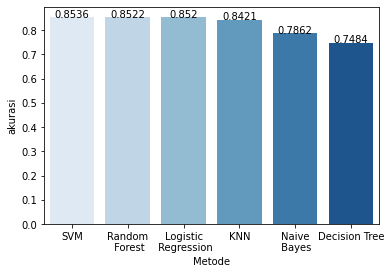

In [ ]:
# Akurasi
ac = sns.barplot(data=df_akurasi, x='Metode',y='akurasi',palette = "Blues")

for index, row in df_akurasi.iterrows():
    ac.text(row.name,row.akurasi, str(round(row.akurasi,4)), color='black', ha="center")